# Crime in US

As we live in a society constantly exposed to violence from several sources of information, social media has played a crucial role in not only sharing violent situations instantaneously, but also in providing more data to get a better understanding of when, how and why those complex problems occured in the past. In US, for instance, incidents involving guns have rapidly increased over the last 5 years. However, we barely know some of the social factors that contribute to this interesting numbers and we now have the possibility to dig further into these conditions and have a fresh perspective that may explain some unhiden patterns that may lead to interesting steps in preventing them to happen so often.

In addition, researches have considered and measured Social and Economic factors like Income, Health, Education, Family live, Housing, progress on industrialization, urbanization etc. Based on this study, those variables are important factors that lead a person to commit a Crime. Even though some researches have said that these factors influence rates of crime, there are others that for whom this result is not clear. In order to understand better the issue and later as a Society prevent Crime raising levels in our cities. We are going to analyze the relationship with those factors and find out their impact in Crime level in our Cities. The following data analysis is going to find out how Social and Economic factors has been influencing or not, the rates of Crime in US and in the City of Pittsburgh PA during the 2014 and 2015 in US. We are going to take in consideration the levels and rates of Population, Education, Income, House Contract, and House Value to identify some insights, patterns or trends about this social phenomenon. 

# Hypothesis

1. Main factors why violence occurs in US (rel)
2. Males participate more in violent incidents in comparisson with Women.
3. Incidents where the perpetrator knows the victim are more deadly than those in which is unknown.
4. Southern states (near Mexico) present higher levels of violence 
4. Gun permission vs deaths

Pittsburgh
1.-Social & Economic conditions influence Crime rate levels.
Null Hypothesis:
If the population’s Social and Economic conditions (Income, Education) get better, then Crime’s rate level will decrease.



Licenses vs Gun crimes - There is a correlation between the number of crimes and the number of approved licenses per state

# Why are we focusing on these questions?
Describe the questions you and your group found interesting, and what motivated you to answer them 

#### 1. Main factors why violence occurs in US (rel)


#### 2. Males participate more in violent incidents in comparison with Women.
Research has shown that when it comes to violent crimes, Male could act more aggresive than Women. While this can be explained  because of the impact of environmental and biological traits on each gender, there is no doubt that men present higher levels of  physical violence and verbal abuse than women. In fact, women show an indirect aggresive behavior such as hurt other's reputation by spreading rumors or damage their social standing. Therefore, we would like to know if this aggression is also presented in the gun violence in the US. We consider it an intriguing topic which we could hopefully answer in the data.

#### 3. Incidents where the perpetrator 'knows' the victim are more deadly than those in which is 'unknown', like robberies.
This statement came to this list after exploring some data and realizing that not only mass shootings or robbery occur in the US, but also sentimental tragedies in close relationships. Due to the fact that these unfortunate events happen frequently, we suggest that those moments in which the suspect knows the victim(s) and perpetrate crimes result in lethal results in contrast with those in which there is only a robbery.

#### 4. Southern states (near Mexico) present higher deaths than other locations  in US
Drug issues in states near the border from Mexico is a familiar problem where even the current administration in USA has established several approaches to effectively limit this consumption with no successful results. Therefore, we think that there might be a possible correlation between the number of deaths and the location.

## Why Pittsburgh?
It turns out that Pennsylvania is one of the states with an important decrease in the number of violent incidents per year. There must be some social, economical and even educational factors that have contributed to reach those indicators. Along with information we found about Pittsburg, a city within Pennsylvania, we think that we can explain the reason why this has happened.



#### 1. Income vs Crime 
As a society or individual, we assume based on several research that Income Factor plays an important role in increasing Crime levels. We know that Poverty, Unemployment and other Economic factor like these affect the person or family’s Income. These factors have been mentioned by studies as the most frequent reason to commit a Crime. Our challenge will be to find how strong is the relationship between Income factor and Crime Level and measure it's impact in our Society. 

#### 2. Education vs Crime 
Education got many benefits for an individual or a society. Some studies have shown that Education reduce poverty, so in consequence we assume that it could increase the Income and reduce Crime levels. Researches in US have stablished that by increasing the high school graduation rate as a result the Crime levels have decreased. We want to know how strong is the relationship between Education factor and Crime Level, and measure it’s impact against crime rate over a period of time.


Having a gun raises the number of crimes?
About 40% of Americans say they own a gun or live in a household with one, according to a 2017 survey, and the rate of murder or manslaughter by firearm is the highest in the developed world.

In [1]:
Paolo:

SyntaxError: invalid syntax (<ipython-input-1-2adeebd81225>, line 1)

In [ ]:
Mike: 

# Datasources
Summarize where and how you found the data you used to answer these questions 

### 1. Gun Data (csv)
"Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online." - Kaggle


### 2. Pittsburgh (csv)
Data was collected from Public PA State US  and Data gov US Sites (this data is public and can be used for different
purposes).In order to have a significant data set to work with, we choose a Crime data set from 2005 to 2015.
Education and Income data is not available the same period, so we have only 2 years 2014 and 2015. We believed that
it will get us enough  data to perform our analysis.

Data Sources and Link:
https://catalog.data.gov/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data
file: educational-attainment-for-the-population-25-years-and-over_2014
file: P_aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars_ok
file: self-employment-income-in-the-past-12-months-for-households_2014
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data
file: educational-attainment-for-the-population-25-years-and-over_2015
file: P_aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars_ok
file: self-employment-income-in-the-past-12-months-for-households_2015
https://data.wprdc.org/dataset?q=police&page=1
File: Police Incident Blotter (Archive)
https://en.wikipedia.org/wiki/Pittsburgh
Population 2014,2015

In [ ]:
Lau: PRUEBA CON PAOLO

In [ ]:
Paolo:

In [ ]:
Mike: 
    



# Cleanup process

#### 1. Gun Data (csv)
##### Challenges:
    1. Large datafile (> 200K rows)
    2. Memory consumption
    3. Web scrapping files (fields with || or :: patterns)
    4. Information with missing values
    5. Save/Load pickle files (optimize data loading)

##### Approach:
    1. Chunk size to optimize loading requests in large csv file to avoid memory consumption errors.
    2. Manipulate each set of data according to some patterns for each column to build independent dataframes (python definition).
    3. Process and store cleaned dataframes in pickle objects.
    4. Load stored dataframes to facilitate their processing.

In [4]:
# Import dependencies
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
from functions import splitColumnsDF
from functions import readWholeDataset
import gmaps
from api_keys import g_key
import requests
import time
import json
import datetime
import os

# Configure maps key
gmaps.configure(api_key=g_key)

Loading function...


ModuleNotFoundError: No module named 'gmaps'

In [ ]:
Lau: Data cleaning ---Miguel Rojas

No  files found


In [2]:
# ================ Import Data gun file  ========================
urlGunViolence = "../gun-violence-data_01-2013_03-2018.csv"
# Read whole dataset
#readWholeDataset(urlGunViolence)

# ================= Loading cleaned data  ===================== 
try:
    print("Loading files")
    gunViolenceDf = pd.read_pickle("Resources/gunViolence.pkl")
    print("Loading gunViolenceDf")
    gunStolenDF = pd.read_pickle("Resources/gunStolen.pkl")
    print("Loading gunStolenDF")
    gunTypeDF = pd.read_pickle("Resources/gunType.pkl")
    print("Loading gunTypeDF")
    ageDF = pd.read_pickle("Resources/age.pkl")
    print("Loading ageDF")
    ageGroupDF = pd.read_pickle("Resources/ageGroup.pkl")
    print("Loading ageGroupDF")
    genderDF = pd.read_pickle("Resources/gender.pkl")
    print("Loading genderDF")
    relationshipDF = pd.read_pickle("Resources/relationship.pkl")
    print("Loading relationshipDF")
    statusDF = pd.read_pickle("Resources/status.pkl")
    print("Loading statusDF")
    typeDF = pd.read_pickle("Resources/type.pkl")
    print("Loading typeDF")
except Exception:
    print("No pickle files found")

Loading files
Loading gunViolenceDf
Loading gunStolenDF
Loading gunTypeDF
Loading ageDF
Loading ageGroupDF
Loading genderDF
Loading relationshipDF
Loading statusDF
Loading typeDF


In [2]:
# Dependencies and Setup

try:

    #Load File (CSV)
    print("Loading files")
    file_ori_blotter = "Resources/P_archive-police-blotter_ok.csv"
    f_income_p_all = "Resources/P_income_pittsburg_byyear.csv"
    f_income_p_14= "Resources/P_h_income_2014.csv"
    f_income_p_15= "Resources/P_h_income_2015.csv"
    f_us_edu_05_15 = "Resources/P_us_edu_1995_2015.csv"
    f_edu_p_14 ="Resources/P_educational-attainment-for-the-population-25-years-and-over_2014_ok.csv"
    f_edu_p_15="Resources/P_educational-attainment-for-the-population-25-years-and-over_2015_ok.csv"
    ori_blotter_df = pd.read_csv(file_ori_blotter, dtype={"pk": object})
    ori_inc_p_df = pd.read_csv(f_income_p_all)
    ori_inc_p_14_df = pd.read_csv(f_income_p_14)
    ori_inc_p_15_df = pd.read_csv(f_income_p_15)
    ori_inc_p_14_df = pd.read_csv(f_income_p_14, dtype={"Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)": float})
    ori_inc_p_15_df = pd.read_csv(f_income_p_15, dtype={"Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)":float})
    ori_edu_p_14_df = pd.read_csv(f_edu_p_14)
    ori_edu_p_15_df = pd.read_csv(f_edu_p_15)
    ori_us_edu_05_15_df = pd.read_csv(f_us_edu_05_15)
    v_fori_blo_df = ori_blotter_df
    #display(ori_us_edu_05_15_df.head())
except Exception:
     print("No  files found")
print("Loading done")
#os.getcwd()

Loading files
Loading done


In [3]:
# Cleaning process
# convert string time to date d/m/y
ori_blotter_df['INCIDENTTIME'] = pd.to_datetime(ori_blotter_df['INCIDENTTIME']).dt.floor('d')
ori_blotter_df['year'] = ori_blotter_df['INCIDENTTIME'].dt.year


# new data frame with split value columns 
v_split_df = ori_blotter_df["OFFENSES"].str.split(" ", n = 1, expand = True) 
# making separate  column from new data frame 
v_split_df["Offense_id"]= v_split_df[0]  
# making separate column from new data frame 
v_split_df["Offense"]= v_split_df[1] 

#merge master df
v_grp_metrics_df = pd.merge(ori_blotter_df,v_split_df , left_index=True,right_index=True)

# rename  colums 

v_grp_metrics_df.rename(columns={'OFFENSES':'Offenses','INCIDENTNEIGHBORHOOD':'neighborhood'}, inplace=True)
ori_inc_p_df.rename(columns={"Date":"year","Pittsburgh":'PiHincome'}, inplace=True)
ori_inc_p_14_df.rename(columns={"Neighborhood":"neighborhood",'Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)':'H_income_2014'}, inplace=True)
ori_inc_p_15_df.rename(columns={"Neighborhood":"neighborhood",'Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)':'H_income_2015'}, inplace=True)

ori_edu_p_14_df.rename(columns={"Neighborhood":"neighborhood",'Estimate; Total:':'t_edu_25_2014','Estimate; Total: - No schooling completed':'t_no_sc_complete','Estimate; Total: - Nursery school':'t_nur_sc','Estimate; Total: - Kindergarten':'t_kgarden','Estimate; Total: - 1st grade':'f1_grade','Estimate; Total: - 2nd grade':'f2_grade',
                                                                                  'Estimate; Total: - 3rd grade':'f3_grade','Estimate; Total: - 4th grade':'f4_grade','Estimate; Total: - 5th grade':'f5_grade','Estimate; Total: - 6th grade':'f6_grade','Estimate; Total: - 7th grade':'f7_grade','Estimate; Total: - 8th grade':'f8_grade',
'Estimate; Total: - 9th grade':'f9_grade','Estimate; Total: - 10th grade':'f10_grade','Estimate; Total: - 11th grade':'f11_grade','Estimate; Total: - 12th grade, no diploma':'f12_grde','Estimate; Total: - Regular high school diploma':'t_reg_hcd',
                                'Estimate; Total: - GED or alternative credential':'t_ged_dip','Estimate; Total: - Some college, less than 1 year':'t_coll_less1y','Estimate; Total: - Some college, 1 or more years, no degree':'t_coll_more1y_nd','Estimate; Total: - Associates degree':'t_asoc_degree','Estimate; Total: - Bachelors degree':'t_bac_degree',
                                'Estimate; Total: - Masters degree':'t_master_degree','Estimate; Total: - Professional school degree':'t_pro_sc_degree','Estimate; Total: - Doctorate degree':'t_doc_degree'}, inplace=True)
ori_edu_p_15_df.rename(columns={"Neighborhood":"neighborhood",'Estimate; Total:':'t_edu_25_2015','Estimate; Total: - No schooling completed':'t_no_sc_complete','Estimate; Total: - Nursery school':'t_nur_sc','Estimate; Total: - Kindergarten':'t_kgarden','Estimate; Total: - 1st grade':'f1_grade','Estimate; Total: - 2nd grade':'f2_grade',
                                                                                  'Estimate; Total: - 3rd grade':'f3_grade','Estimate; Total: - 4th grade':'f4_grade','Estimate; Total: - 5th grade':'f5_grade','Estimate; Total: - 6th grade':'f6_grade','Estimate; Total: - 7th grade':'f7_grade','Estimate; Total: - 8th grade':'f8_grade',
'Estimate; Total: - 9th grade':'f9_grade','Estimate; Total: - 10th grade':'f10_grade','Estimate; Total: - 11th grade':'f11_grade','Estimate; Total: - 12th grade, no diploma':'f12_grde','Estimate; Total: - Regular high school diploma':'t_reg_hcd',
                                'Estimate; Total: - GED or alternative credential':'t_ged_dip','Estimate; Total: - Some college, less than 1 year':'t_coll_less1y','Estimate; Total: - Some college, 1 or more years, no degree':'t_coll_more1y_nd','Estimate; Total: - Associates degree':'t_asoc_degree','Estimate; Total: - Bachelors degree':'t_bac_degree',
                                'Estimate; Total: - Masters degree':'t_master_degree','Estimate; Total: - Professional school degree':'t_pro_sc_degree','Estimate; Total: - Doctorate degree':'t_doc_degree'}, inplace=True)

ori_us_edu_05_15_df.rename(columns={"Year":"year"}, inplace=True)

#Creae new columns
ori_edu_p_14_df['year']='2014'
ori_edu_p_15_df['year']='2015'

# df for comparatives

v_ori_com_df =v_grp_metrics_df
v_fori_blo_df = v_grp_metrics_df
v_ori_blotter_df = v_grp_metrics_df
v_ori_inc_p_df= ori_inc_p_df
v_ori_inc_p_14_df = ori_inc_p_14_df
v_ori_inc_p_15_df = ori_inc_p_15_df
v_ori_edu_p_14_df=ori_edu_p_14_df
v_ori_edu_p_15_df=ori_edu_p_15_df
v_ori_us_edu_05_15_df=ori_us_edu_05_15_df


# select 2 columns to work with
v_ori_blotter_df = v_ori_blotter_df[['year','Offenses']]
v_ori_inc_p_14_df = v_ori_inc_p_14_df[['neighborhood','H_income_2014']]
v_ori_inc_p_15_df = v_ori_inc_p_15_df[['neighborhood','H_income_2015']]
v_ori_edu_p_14_df = v_ori_edu_p_14_df[['neighborhood','t_edu_25_2014']]
v_ori_edu_p_15_df = v_ori_edu_p_15_df[['neighborhood','t_edu_25_2015']]
v_ori_us_edu_05_15_df=v_ori_us_edu_05_15_df[['year','Sex','Age_Range','Total']]
#display(v_ori_us_edu_05_15_df.head())

# group by 
v_ori_blotter_df= pd.DataFrame({'Offenses':v_ori_blotter_df.groupby(['year'], sort=False)['Offenses'].count()}).reset_index()
v_ori_us_edu_05_15_df= pd.DataFrame({'t_edu':v_ori_us_edu_05_15_df.groupby(['year'], sort=False)['Total'].sum()}).reset_index()
#display(v_ori_us_edu_05_15_df.head())

# merge the crime df and income df for Pittsburg
v_grp_metrics_df = pd.merge(v_ori_inc_p_df ,v_ori_blotter_df , on=["year"])


# sort df by year
v_grp_metrics_df.sort_values(by=['year'], inplace=True)

#display(v_grp_metrics_df.head())

# Data Exploration

1. Incidents per year [2014-2017]
2. Top 10
3. Bottom 10
4. 

# Top and bottom 10 violent states according to the number of deaths from 2014-2017

Description

In [8]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import seaborn as sns
import calendar as cal

In [9]:
#mImporting datasets
df = pd.read_csv(r'C:\Users\1000204905\Desktop\GitHub\gun_violence.csv')
df2 = pd.read_csv(r'C:\Users\1000204905\Desktop\GitHub\gun_violence.csv',parse_dates=['date'], index_col=['date'])

In [10]:
#Create new columns with day, month and year
df2['day'] = df2.index.day
df2['month'] = df2.index.month
df2['year'] = df2.index.year

#Remove the years 2013 and 2018
new_data=df2[(df2.year>=2014) & (df2.year<=2017)]

#Count the crimes 
incident_count=new_data.groupby('state').agg('count')

#Sort by deaths
incident_count

killed_number=new_data.groupby('state').sum()
killed_sort=killed_number.sort_values(by='n_killed',ascending=False)

#Top 10 contries by killed number
top=killed_sort.head(10)
bottom=killed_sort.tail(10)

# of incidents per year

In [14]:
incident_count_year=new_data.groupby('year').agg('count')

([<matplotlib.axis.XTick at 0x266582d35c0>,
 <a list of 4 Text xticklabel objects>)

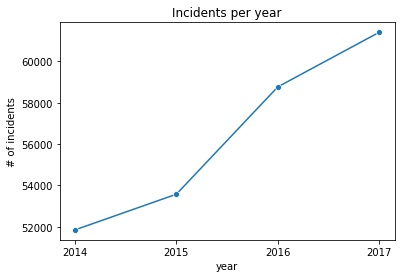

In [26]:
incident_count_year

sns.lineplot(x=incident_count_year.index, 
             y=incident_count_year.incident_id,
             marker="o")

plt.ylabel('# of incidents')
plt.title('Incidents per year')

plt.xticks(np.arange(2014, 2018, 1))

[Text(0,0,'California'),
 Text(0,0,'Texas'),
 Text(0,0,'Florida'),
 Text(0,0,'Illinois'),
 Text(0,0,'Ohio'),
 Text(0,0,'Georgia'),
 Text(0,0,'Pennsylvania'),
 Text(0,0,'North Carolina'),
 Text(0,0,'Louisiana'),
 Text(0,0,'Missouri')]

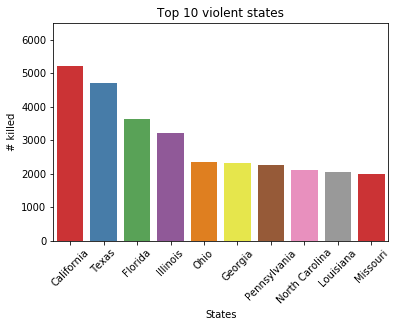

In [10]:
#bar plot top
killed_years=sns.barplot(x=top.index, y=top.n_killed,data=top,palette='Set1')
plt.xlabel('States')
plt.ylabel('# killed')
plt.title('Top 10 violent states')
killed_years.set_ylim([0,6500])
killed_years.set_xticklabels(killed_years.get_xticklabels(),rotation=45)

[Text(0,0,'Idaho'),
 Text(0,0,'Montana'),
 Text(0,0,'Maine'),
 Text(0,0,'New Hampshire'),
 Text(0,0,'South Dakota'),
 Text(0,0,'North Dakota'),
 Text(0,0,'Wyoming'),
 Text(0,0,'Hawaii'),
 Text(0,0,'Rhode Island'),
 Text(0,0,'Vermont')]

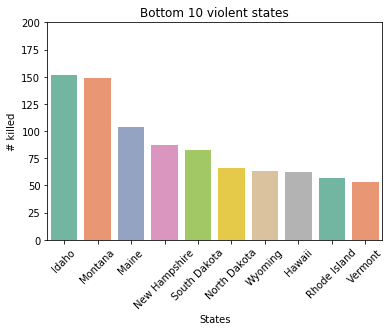

In [11]:
#bar plot bottom
killed_years_bottom=sns.barplot(x=bottom.index, y=bottom.n_killed,data=bottom,palette='Set2')
plt.xlabel('States')
plt.ylabel('# killed')
plt.title('Bottom 10 violent states')
killed_years_bottom.set_ylim([0,200])
killed_years_bottom.set_xticklabels(killed_years_bottom.get_xticklabels(),rotation=45)

# What are the most common type of violent incidents in the US?

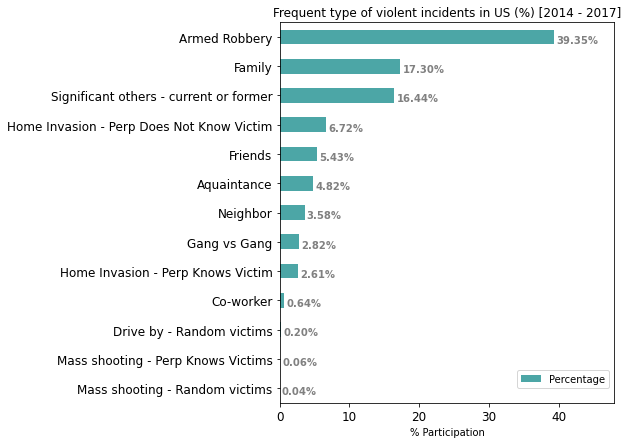

In [5]:
# Filter years 2014 - 2018
rel = relationshipDF.loc[(relationshipDF["year"] > 2013) & (relationshipDF["year"] < 2019)]
rel = rel.loc[:,["Value","Total"]].groupby(by="Value").sum()
relMax = rel["Total"].sum()
# Calculate the percentage out of the total
rel["Percentage"] = (rel["Total"]/relMax)*100
# Remove unused column
rel.drop(columns="Total", inplace=True)
# Descending order for plottling
rel = rel.sort_values(by="Percentage", ascending=True)

# Plot
ax = rel.plot(kind="barh",align="center", color="teal", alpha=0.7, figsize=(6,7), fontsize=12)
plt.title(f"Frequent type of violent incidents in US (%) [2014 - 2017]")
plt.ylabel("")
plt.xlabel("% Participation")
plt.xlim(0,48)
ax.get_legend().set_bbox_to_anchor((1, 0.1))

#Add data labels to graph
for i, value in enumerate(rel["Percentage"]):
    ax.text(value + 0.3, i - 0.2, str("{:,.2f}%".format(value)), color='grey', fontweight='bold')
    
plt.show()

Interestingly, this graph shows that in just four years (2014 - 2018), Armed Robbery has been the most frequent violent incident that occurs in the US. 39% indicates that people commonly face this kind of violence as perpetrators threating victims with a handgun. However, family-related issues (17%) and couple relationship (17%) are also another kind of violent incidents.

### 2. Which is the typical guntype involved in those incidents?

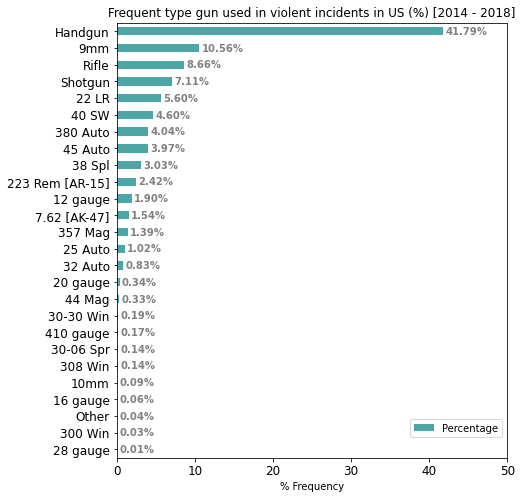

In [7]:
# Filter years 2014 - 2018
gun = gunTypeDF.loc[(gunTypeDF["year"] > 2013) & (gunTypeDF["year"] < 2018) & (gunTypeDF["Value"] != "Unknown")]
gun = gun.groupby(by=["Value"], as_index=False).aggregate({"incident_id":"count",
                                                          "Total":"sum",
                                                          "n_killed":"max",
                                                          "n_injured":"max"})
gunTotal = gun["Total"].sum()
gun["Percentage"] = (gun["Total"]/gunTotal)*100
gun = gun.sort_values(by="Percentage",ascending=True)
gun = gun.loc[:,["Value","Percentage"]]
gun.set_index("Value",inplace=True)


# Plot
ax = gun.plot(kind="barh",align="center", color="teal", alpha=0.7, figsize=(7,8), fontsize=12)
plt.title(f"Frequent type gun used in violent incidents in US (%) [2014 - 2017]")
plt.ylabel("")
plt.xlabel("% Frequency")
plt.xlim(0,50)
ax.get_legend().set_bbox_to_anchor((1, 0.1))

#Add data labels to graph
for i, value in enumerate(gun["Percentage"]):
    ax.text(value + 0.3, i - 0.2, str("{:,.2f}%".format(value)), color='grey', fontweight='bold')
    
plt.show()



+ Although there are many 'Unknown' in this dataset, we did not include it as part of this analysis.

Unsurprisingly, a handgun is the first choice for perpetrators to commit a violent act. Over 41% prefers a small gun, presumably, because its usability, portability and permission to use in the US. 

In [ ]:
Mike:

# Social and Economic Factors (Education, Income) behavior in US

,year,US,Pennsylvania,PiHincome,Offenses
9,2006,59051,56379,52724,51832
8,2007,60135,57570,54079,49679
7,2008,59382,57880,54504,47834
6,2009,57519,56716,53084,44124
5,2010,56388,55534,52618,41616


<Figure size 432x288 with 0 Axes>

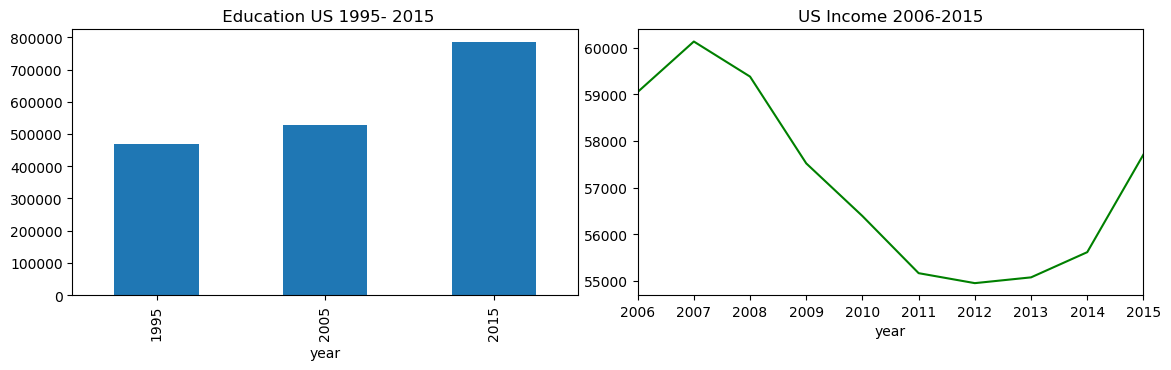

In [4]:
# Crime, Education and Income in US overview getting some insight from it

display(v_grp_metrics_df.head(5))

fig = plt.figure()
fig = plt.figure(figsize=(12,7), dpi=100)

#  Education us
ax1 = fig.add_subplot(221) #121
ax = v_ori_us_edu_05_15_df.plot(x='year',  y='t_edu', ax=ax1, kind="bar",
                           legend = False, title = " Education US 1995- 2015")
#  Income  us

ax2 = fig.add_subplot(222) #122
fig.tight_layout(pad=2.0)
ax = v_grp_metrics_df.plot(x='year',  y='US', ax=ax2, kind="line", color="green",
                           legend = False, title = "US Income 2006-2015")

# Crime in US
#ax3 = fig.add_subplot(234) 
#ax = v_grp_metrics_df.plot(x='year',  y='Offenses', ax=ax3, kind="line", color="green",
#                           legend = False, title = "xxx")



plt.show()


* The figures shown that Eduction (Social Factor) behave in a opposite correlation, Education is trending up and Income is trending down mean while Crime Level are getting up. What is the correlation between Income, Ecucation level and Crime to prove our Hypothesis.
* Some other questions arise:
* Would you like to live Pittsburg based on the Crime line plot above?
* Is the Income variable one of the most important factors (base on some studies) to take in account and improve Crime Leves is City?
* Can we focus on a particular state to measure these 3 viables?.

In [7]:
# offences by period neighborhood, crime distribution

v_grp_met_nec_df =v_fori_blo_df 
# select 2 columns to work with
v_grp_met_nec_df = v_grp_met_nec_df[['neighborhood','Offenses']]

#group by 
v_grp_met_nec_df= pd.DataFrame({'Offenses':v_grp_met_nec_df.groupby(['neighborhood'], sort=False)['Offenses'].count()}).reset_index()

# get total offences and their proportion
v_total= v_grp_met_nec_df["Offenses"].sum()

# calculate a new percent column
v_grp_met_nec_df["Percentage"] =(v_grp_met_nec_df["Offenses"]*100 )/ v_total

# sort df by year
v_grp_met_nec_df.sort_values(by=['Offenses'], ascending=False, inplace=True)
#v_grp_metrics_df.to_csv (r'C:\Users\user\Documents\ITESM_DA\others\pro_pro\Project1\Resources\neiper.csv', index = False, header=True)

# filter df to get significative 
v_grp_metrics_80_df=v_grp_met_nec_df
#v_grp_metrics_80_df = v_grp_metrics_df[v_grp_metrics_df['Offense']>=10000]
#display(v_grp_metrics_80_df.head(5)) 

# filter df to get significative qty 

v_grp_metrics_20_df=v_grp_met_nec_df
#v_grp_metrics_20_df= v_grp_metrics_df[(v_grp_metrics_df['Offense'] <= 1000)]
#display(v_grp_metrics_20_df.head(5))   


# Crime Distribution Levels by Neighborhood   (Pittsburgh)

<Figure size 432x288 with 0 Axes>

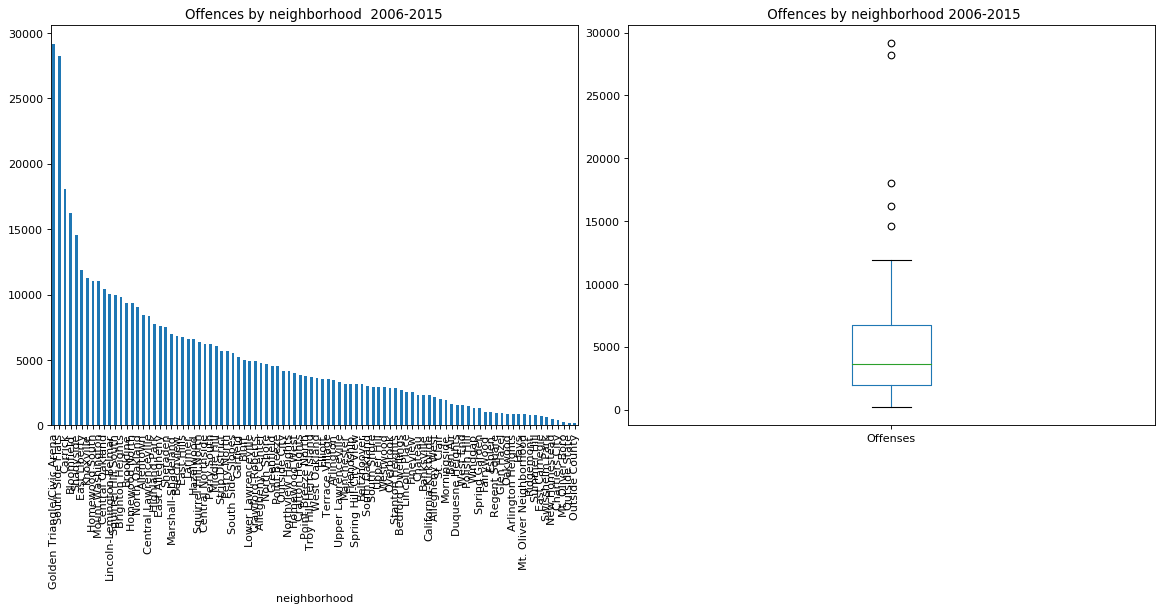

In [9]:
#plot results Offense by neighborhood 
fig = plt.figure()
fig = plt.figure(figsize=(15, 8), dpi=80)
ax1 = fig.add_subplot(121)
ax = v_grp_metrics_80_df.plot(x='neighborhood',  y='Offenses', ax=ax1, kind="bar",
                           legend = False, title = "Offences by neighborhood  2006-2015")

# plot results Offense by neighborhood 
ax2 = fig.add_subplot(122) 
fig.tight_layout(pad=2.0)
ax = v_grp_metrics_20_df.plot(x='neighborhood',  y='Offenses', ax=ax2, kind="box",
                           legend = False, title = " Offences by neighborhood 2006-2015")
plt.show()

* Would you like to live in (Pittsburg), why ?
* What Neighborhood are you going to live in?
* Is this graph telling you the complete story to support where I might want to live,
* What about other factors like Income and Education
* Statistics are going to give us the basis to learn from the past and predic the future
* Get some additonal metrics :
* What are those Neighborhoods with mayor chime level change over 9 year period?
* Include Income and Education factors

# Data Analysis
## General
Describe the analysis process (accompanied by your Jupyter Notebook) 

1. Correlations & distribution graphs

# Correlation between the # of licenses and gun crimes

In [12]:
#Dataset with th enumber of licenses per state
df3 = pd.read_csv(r'C:\Users\1000204905\Desktop\GitHub\Federal_Firearms.csv')

In [13]:
df3.set_index('State')
license=df3.rename(columns={"State": "state"})
left_merge=pd.merge(killed_number,license, on='state',how='left')

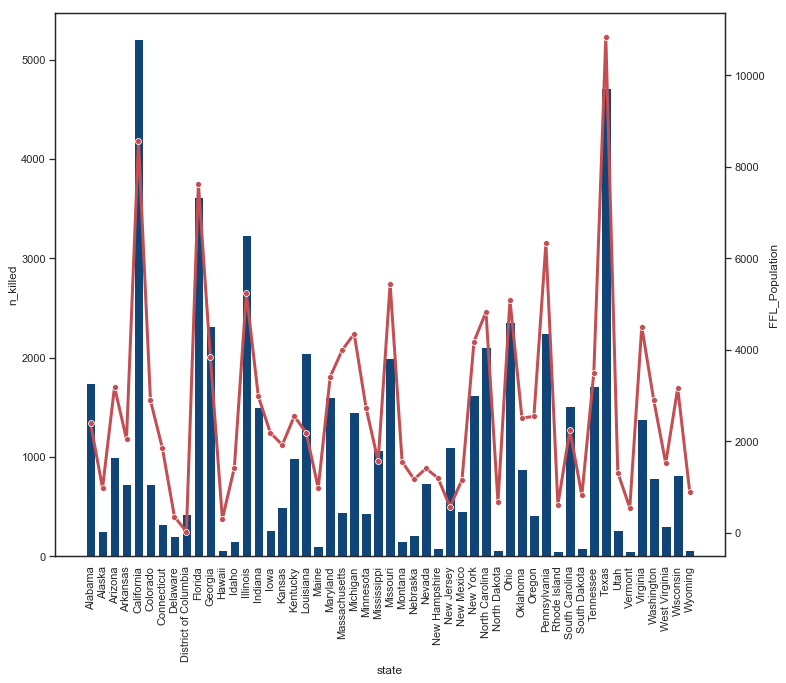

In [14]:
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(12,10))
ax2 = ax1.twinx()
sns.barplot(x=left_merge.state,
            y=left_merge.n_killed, 
            color='#004488',
            ax=ax1)

sns.lineplot(x=left_merge.state, 
             y=left_merge.FFL_Population,
             color='r',
             marker="o",
             ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
sns.set()

### 3. Incidents where the perpetrator 'knows' the victim are more deadly than those in which is 'unknown', like robberies.

===================== Family ========================
 The correlation is: 0.562
 The r values is: 0.56
 The equation is: 0.76x + 0.76


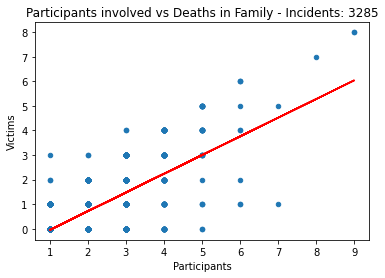

===================== Significant others - current or former ========================
 The correlation is: 0.315
 The r values is: 0.31
 The equation is: 0.44x + 0.44


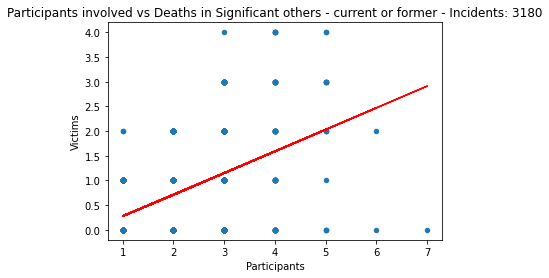

===================== Armed Robbery ========================
 The correlation is: 0.189
 The r values is: 0.19
 The equation is: 0.08x + 0.08


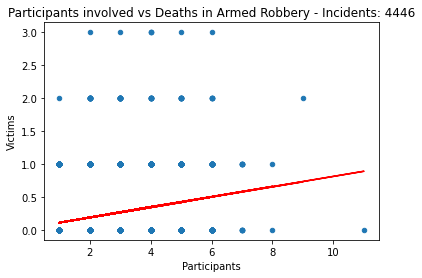

In [12]:
# Unique values of the type of relationship in the dataset
values = ["Family","Significant others - current or former", "Armed Robbery"]
participants = genderDF.groupby(by="incident_id", as_index=False).aggregate({"Total":"sum",
                                                                            "n_killed":"max",
                                                                            "n_injured":"max"})

participants = participants.loc[:,["incident_id","Total","n_killed","n_injured"]]

family_data = []
significant_other_data = []
robbery_data = []

# Graph deaths and injured for each kind of relationships involved in the incidents
for val in values:
    
    print(f"===================== {val} ========================")
    
    
    
    # Get the information from relationship in each incident and rename the Total column
    rel = relationshipDF.rename(columns={"Total":"Rel"})    
    # Filter a single type of relationship and get the appropiate final numbers per column
    rel = rel.loc[(rel["Value"] == val)
                 & (rel["year"] > 2013) & (rel["year"] < 2018),
                 ].groupby(by="incident_id", as_index=False).aggregate({"Rel":"sum","n_killed":"max","n_injured":"max"})
    
    # Merge relationship with participants
    merge_df = rel.merge(participants.loc[:,["incident_id","Total"]], how="inner", on="incident_id")
    #merge_df["n_total"] = merge_df["n_injured"] + merge_df["n_killed"]
    
    # Linear Regression Model
    x_values = merge_df["Total"]
    y_values = merge_df["n_killed"]
    y_lr_values = []
    n = len(x_values)
    # Calculate the regression model
    slope, intercept, rvalue, pvalue, stderr = linregress(x = x_values, y = y_values)

    # Calculate the y = Mx + b values
    for lat in x_values:
        y_lr_values.append(round((slope * lat + intercept),2))

    corr, _ = stats.pearsonr(x_values, y_values)
    print(" The correlation is: {:.3f}".format(corr))
    print(f" The r values is: {round(rvalue,2)}")
    print(f" The equation is: {round(slope,2)}x + {round(slope,2)}")
    
    if(val == "Family"):
        family_data = y_values
    elif (val == "Armed Robbery"):
        robbery_data = y_values
    else:
        significant_other_data = y_values
    
    
    # Plots
    ax = merge_df.plot(x = "Total",y = "n_killed", kind="scatter")
    plt.title(f"Participants involved vs Deaths in {val} - Incidents: {n}")
    plt.xlabel("Participants")
    plt.ylabel("Victims")
    plt.plot(x_values, y_lr_values, color="red")
    plt.show()


Considering the three most frecuent types of violent incidents in the US, it turns out that family-related issues such as direct Family relationships and significat others are, in fact, more deadlier in comparisson with the armed robbery scenario.
According to our data, the number of people involved in those incidents has a positive correlation with the number of deaths may occur. This sounds a little obvious, but if we look carefully at the graphs and compare the results, a family issue involving 9 people resulted with 8 out of 9 killed (88% of losses), whereas in a robbery involving the same amout of people, only 2 were killed (25% of losses). In other words, although the armed robbery is more common in US, conflicts within a family may lead to fatal endings.

### 4. Southern states (near Mexico) present higher deaths than other locations  in US

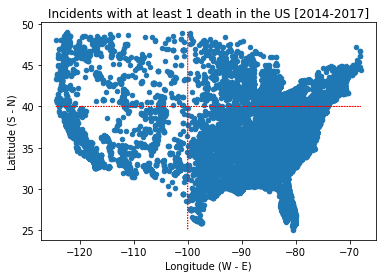

In [76]:
#display(gunViolenceDf.loc[gunViolenceDf["n_killed"] > 35])

location = gunViolenceDf.loc[(gunViolenceDf["year"] >= 2014)  
                             & (gunViolenceDf["year"] <= 2017)  
                             & (gunViolenceDf["n_killed"] > 0)  
                             & (gunViolenceDf["latitude"] <= 50) 
                             & (gunViolenceDf["latitude"] >= 25) 
                             & (gunViolenceDf["longitude"] <= -66)
                             & (gunViolenceDf["longitude"] >= -130)
                             ,["year","incident_id","latitude","longitude","n_killed", "n_injured","state","city_or_county"]]

#print(location["incident_id"].count())
#print(location["n_killed"].sum())
#print(location["n_injured"].sum())

location["n_total"] = location["n_killed"] + location["n_injured"]

ax = location.plot(x = "longitude",y = "latitude", kind="scatter")
plt.title(f"Incidents with at least 1 death in the US [2014-2017]")
plt.xlabel("Longitude (W - E)")
plt.ylabel("Latitude (S - N)")

x_values = location["longitude"]
y_values = location["latitude"]

# print segments per state
plt.plot([x for x in x_values], [40 for y in y_values], color="red",linestyle=":", linewidth=1)
plt.plot([-100 for x in x_values], [y for y in y_values], color="red", linestyle=":", linewidth=1)

plt.show()

In [77]:
results = location.groupby(by="state").aggregate({"incident_id":"count",
                                                 "n_killed":"sum",
                                                 "n_injured":"sum",
                                                  "latitude":"mean",
                                                  "longitude":"mean",
                                                 "n_total":"sum"})
totalDeaths = results["n_killed"].sum()
results = results.sort_values(by="n_killed", ascending=False)
results["Percentage"] = round((results["n_killed"]/totalDeaths)*100,3)
results = results[0:15]
display(results)

fig = gmaps.figure(center= (35, -100.00),zoom_level=4)
locations = results[["latitude","longitude"]]
weight = results["n_killed"]
heatmap_layer_2 = gmaps.heatmap_layer(locations, weights=weight,point_radius=40,dissipating=True)
fig.add_layer(heatmap_layer_2)


# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Incidents</dt><dd>{incident_id}</dd>
<dt>Deaths</dt><dd>{n_killed}</dd>
<dt>Injured</dt><dd>{n_injured}</dd>
<dt>Deaths % (of total)</dt><dd>{Percentage}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
states_info = [info_box_template.format(**row) for index, row in results.iterrows()]
locations = [(row["latitude"],row["longitude"]) for index, row in results.iterrows()]

# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations, info_box_content = states_info)
fig.add_layer(markers)

fig

,incident_id,n_killed,n_injured,latitude,longitude,n_total,Percentage
state,,,,,,,
California,4552,5070,1131,35.682850,-119.560713,6201,9.501
Texas,3789,4400,813,30.790616,-96.918589,5213,8.245
Florida,2995,3465,820,28.000316,-81.598102,4285,6.493
Illinois,2750,2964,821,41.465783,-88.015387,3785,5.554
Georgia,1970,2224,469,33.210748,-83.782181,2693,4.168
Ohio,1964,2190,419,40.445594,-82.810510,2609,4.104
Pennsylvania,1885,2121,394,40.268513,-76.791323,2515,3.975
North Carolina,1814,2005,367,35.484989,-79.475441,2372,3.757
Missouri,1743,1933,380,38.566469,-91.737385,2313,3.622


Figure(layout=FigureLayout(height='420px'))

In [78]:
# Divide the US in four cuadrants (depending on their latitude and longitude [as shown n the map])
northeast=location.loc[(gunViolenceDf["latitude"] >= 40) & (gunViolenceDf["longitude"] >= -100),["incident_id","n_killed","latitude","longitude","state"]]
northweast=location.loc[(gunViolenceDf["latitude"] >= 40) & (gunViolenceDf["longitude"] < -100),["incident_id","n_killed","latitude","longitude","state"]]
southeast=location.loc[(gunViolenceDf["latitude"] < 40) & (gunViolenceDf["longitude"] >= -100),["incident_id","n_killed","latitude","longitude","state"]]
southweast=location.loc[(gunViolenceDf["latitude"] < 40) & (gunViolenceDf["longitude"] < -100),["incident_id","n_killed","latitude","longitude","state"]]

#northeast=northeast.groupby(by=["latitude","longitude"], as_index=False).aggregate({"incident_id":"count","n_killed":"sum"}) 
#northweast=northweast.groupby(by=["latitude","longitude"], as_index=False).aggregate({"incident_id":"count","n_killed":"sum"}) 
#southeast=southeast.groupby(by=["latitude","longitude"], as_index=False).aggregate({"incident_id":"count","n_killed":"sum"}) 
#southweast=southweast.groupby(by=["latitude","longitude"], as_index=False).aggregate({"incident_id":"count","n_killed":"sum"}) 

# make a comparison based on the number of deaths
northeast = northeast[["n_killed"]]
northweast = northweast[["n_killed"]]
southeast = southeast[["n_killed"]]
southweast = southweast[["n_killed"]]

print("Length of sample for each group:")
display(len(northeast))
display(len(northweast))
display(len(southeast))
display(len(southweast))

print("Mean for each group:")
display(northeast.mean())
display(northweast.mean())
display(southeast.mean())
display(southweast.mean())

print("ANOVA results:")
display(stats.f_oneway(northeast, northweast, southeast, southweast))

print("Comparison between the southerns states:")
t, p = stats.ttest_ind(southeast, southweast, equal_var=False)
print(t)
print(p)

Length of sample for each group:


11126

1650

27752

7090

Mean for each group:


n_killed    1.107676
dtype: float64

n_killed    1.187273
dtype: float64

n_killed    1.120604
dtype: float64

n_killed    1.125952
dtype: float64

ANOVA results:


F_onewayResult(statistic=array([13.60871655]), pvalue=array([7.17817736e-09]))

Comparison between the southerns states:
[-0.87763098]
[0.38016067]


#### Correlation between No incident vs deaths

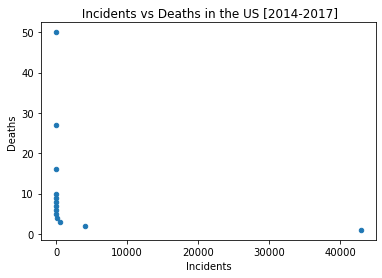

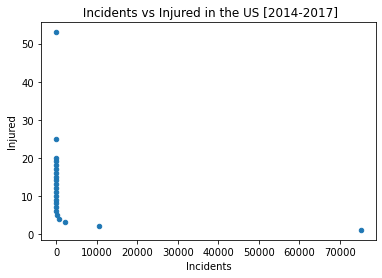

In [93]:
location = gunViolenceDf.loc[(gunViolenceDf["year"] >= 2014)  
                             & (gunViolenceDf["year"] <= 2017)  
                             & (gunViolenceDf["n_killed"] > 0)  
                             & (gunViolenceDf["latitude"] <= 50) 
                             & (gunViolenceDf["latitude"] >= 25) 
                             & (gunViolenceDf["longitude"] <= -66)
                             & (gunViolenceDf["longitude"] >= -130)
                             ,["year","incident_id","latitude","longitude","n_killed", "n_injured","state","city_or_county"]]


result = location.groupby(by="n_killed", as_index=False).count()

ax = result.plot(x ="incident_id", y ="n_killed", kind="scatter")
plt.title(f" Incidents vs Deaths in the US [2014-2017]")
plt.xlabel("Incidents")
plt.ylabel("Deaths")
plt.show()


location = gunViolenceDf.loc[(gunViolenceDf["year"] >= 2014)  
                             & (gunViolenceDf["year"] <= 2017)  
                             & (gunViolenceDf["n_injured"] > 0)  
                             & (gunViolenceDf["latitude"] <= 50) 
                             & (gunViolenceDf["latitude"] >= 25) 
                             & (gunViolenceDf["longitude"] <= -66)
                             & (gunViolenceDf["longitude"] >= -130)
                             ,["year","incident_id","latitude","longitude","n_killed", "n_injured","state","city_or_county"]]
result = location.groupby(by="n_injured", as_index=False).count()
ax = result.plot(x ="incident_id", y ="n_injured", kind="scatter")
plt.title(f" Incidents vs Injured in the US [2014-2017]")
plt.xlabel("Incidents")
plt.ylabel("Injured")

plt.show()



Description to imply that the statement "the higher number of incidents, the more deaths" is not true 

In [ ]:
Mike:

## Pitssburgh

# Correlation beetween Income, Education and Crime Pittsburg

* It is important to know what are those cities that got the hightest percent of crime decrease change for 2006 to 2015
* Base on it we can make a correlation for Income and Education aginst Crime for 2014 and 2015
* We factor Income or Education got the stroges relationship vs Crime, so we can reject  or fail to reject the the Hypothesis.

In [11]:
#Compare crime/neigborg by 2014-2015 and Social Factor like Income
# Get the change crime, income and education level over the period
# I dentify the most important crime rate decrease by neighborhood over time

# select columns to work with
#v_ori_com_df =v_grp_metrics_df
#display (v_ori_com_df.head())
v_ori_com_df= v_ori_com_df[['year',"neighborhood",'Offense']]#,'X','Y']]

#To select rows whose column value is in list 
years = [2005]
v_ori_com0_df = v_ori_com_df[v_ori_com_df['year'].isin(years)]
# select 2 columns to work with
v_ori_com0_df  = v_ori_com0_df [['neighborhood','Offense']]
v_ori_com_2005_df= pd.DataFrame({'Offense_2005':v_ori_com0_df.groupby(['neighborhood'], sort=False)['Offense'].count()}).reset_index()
#75

years = [2014]
v_ori_com1_df = v_ori_com_df[v_ori_com_df['year'].isin(years)]
# select 2 columns to work with
v_ori_com1_df  = v_ori_com1_df [['neighborhood','Offense']]
#v_ori_com1_df.to_csv (r'C:\Users\user\Documents\ITESM_DA\others\pro_pro\Project1\Resources\cx14.csv', index = False, header=True)
v_ori_com_2014_df= pd.DataFrame({'Offense_2014':v_ori_com1_df.groupby(['neighborhood'], sort=False)['Offense'].count()}).reset_index()
#94


years = [2015]
v_ori_com2_df = v_ori_com_df[v_ori_com_df['year'].isin(years)]
# select 2 columns to work with
v_ori_com2_df  = v_ori_com2_df [['neighborhood','Offense']]
v_ori_com_2015_df= pd.DataFrame({'Offense_2015':v_ori_com2_df.groupby(['neighborhood'], sort=False)['Offense'].count()}).reset_index()
#94


#merge offences 2005-2015
v_met_com_crime_df = pd.merge(v_ori_com_2005_df,v_ori_com_2014_df  ,how='right', on=["neighborhood"])

v_met_com_crime_df = pd.merge(v_met_com_crime_df,v_ori_com_2015_df  , on=["neighborhood"])
#94


# merge house hold income to metrics master table
v_met_com_crime_df = pd.merge(v_met_com_crime_df,v_ori_inc_p_14_df  ,how='right', on=["neighborhood"])

v_met_com_crime_df = pd.merge(v_met_com_crime_df,v_ori_inc_p_15_df  , on=["neighborhood"])

#merge education to metrics master table 

v_met_com_crime_df = pd.merge(v_met_com_crime_df,v_ori_edu_p_14_df  , on=["neighborhood"])
v_met_com_crime_df = pd.merge(v_met_com_crime_df,v_ori_edu_p_15_df  , on=["neighborhood"])
#display(v_met_com_crime_df.head())
# compute  percent columns
v_met_com_crime_df["CPer_Of_05_15"] =((v_met_com_crime_df["Offense_2015"])-
                                   (v_met_com_crime_df["Offense_2005"]) )/(v_met_com_crime_df["Offense_2005"])

v_met_com_crime_df["CPer_Of_14_15"] =((v_met_com_crime_df["Offense_2015"])-
                                   (v_met_com_crime_df["Offense_2014"]) )/(v_met_com_crime_df["Offense_2014"])
v_met_com_crime_df["HPer_in_14_15"] =((v_met_com_crime_df["H_income_2015"])-
                                  (v_met_com_crime_df["H_income_2014"]) )/(v_met_com_crime_df["H_income_2015"])

v_met_com_crime_df["Edper_in_14_15"] =((v_met_com_crime_df["t_edu_25_2015"])-
                                  (v_met_com_crime_df["t_edu_25_2014"]) )/(v_met_com_crime_df["t_edu_25_2015"])

#91


#df.a.fillna(value=0, inplace=True)
display(v_met_com_crime_df.head())


,neighborhood,Offense_2005,Offense_2014,Offense_2015,H_income_2014,H_income_2015,t_edu_25_2014,t_edu_25_2015,CPer_Of_05_15,CPer_Of_14_15,HPer_in_14_15,Edper_in_14_15
0,Squirrel Hill North,1267.0,429.0,416.0,561576600.0,577467500.0,5494,5321,-0.671665,-0.030303,0.027518,-0.032513
1,Shadyside,1590.0,1189.0,1149.0,597347500.0,605635700.0,9414,9561,-0.277358,-0.033642,0.013685,0.015375
2,Bedford Dwellings,342.0,269.0,193.0,8979700.0,10529100.0,674,740,-0.435673,-0.282528,0.147154,0.089189
3,Lincoln-Lemington-Belmar,1907.0,800.0,744.0,85472700.0,91032900.0,3375,3305,-0.609858,-0.070000,0.061079,-0.021180
4,Lower Lawrenceville,680.0,332.0,333.0,57051000.0,63562900.0,1942,1936,-0.510294,0.003012,0.102448,-0.003099


# Most Important Neighborhood Crime change   2005 & 2015 year period

* Income & Education metrics are include in df  year and neighborhood
* Percentage are computed by ofence and income:
* Offense between 2005 and 2015
* Income between 2014 and 2015
* A new df is build based on Crime percentage'CPer_Of_05_15'<=-0.50) and Number of Offences 'Offense_2005'>500)

In [13]:
# I dentify the most important crime rate decrease by neighborhood over time
   
v_met_over_per_c_df=v_met_com_crime_df
#v_met_over_per_c_df=v_met_com_crime_df[(v_met_com_crime_df['CPer_Of_05_15']<=-0.30) & (v_met_com_crime_df['Offense_2005']>500)]

#display(v_met_over_per_c_df.head())
#display(v_met_over_per_c_df.count())

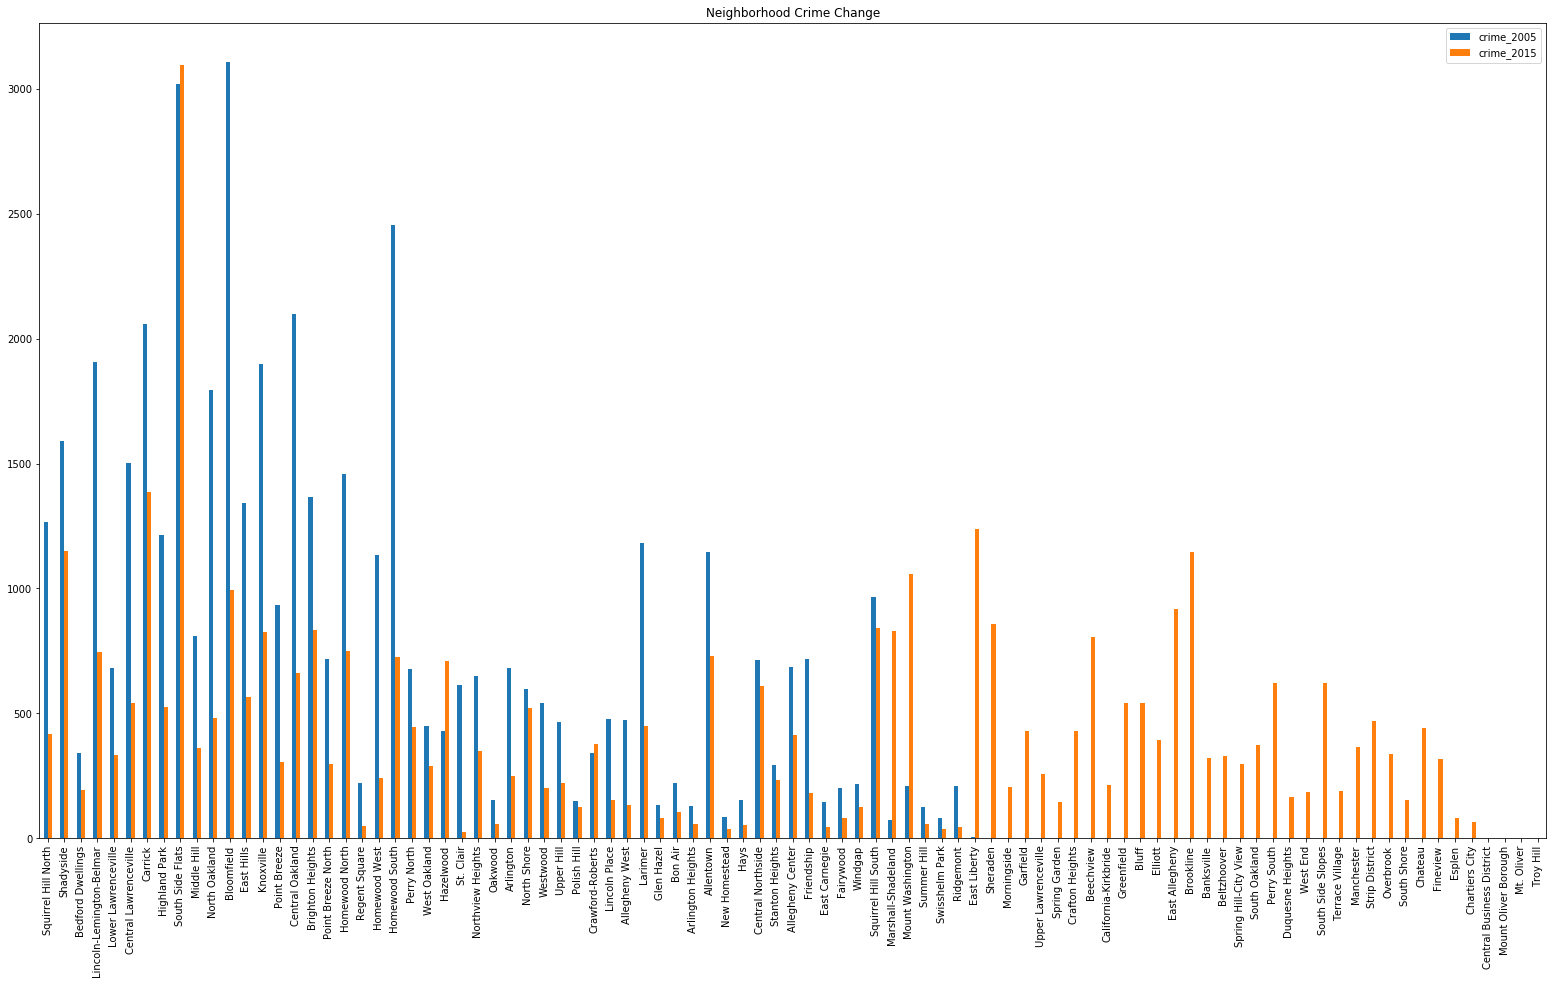

In [14]:
#Crime change by neightbor 2005- 2015
crime_2005_list = v_met_over_per_c_df["Offense_2005"].tolist()
crime_2015_list =v_met_over_per_c_df["Offense_2015"].tolist()
index_com =v_met_over_per_c_df["neighborhood"].tolist()

df1 = pd.DataFrame({'crime_2005':crime_2005_list,'crime_2015':crime_2015_list},index=index_com)
ax = df1.plot.bar( title ="Neighborhood Crime Change", figsize=(27, 15), legend=True, fontsize=10)

# Top 10 Neightborhood highest change crime decrease from 2005-2015

In [15]:
#Stablish the selection criteria  and get the top 10 list 
v_top_over_per_c_df=v_met_com_crime_df[(v_met_com_crime_df['CPer_Of_05_15']<=-0.50) & (v_met_com_crime_df['Offense_2005']>1000)]

display(v_top_over_per_c_df.head(5))
#display(v_top_over_per_c_df.count())

,neighborhood,Offense_2005,Offense_2014,Offense_2015,H_income_2014,H_income_2015,t_edu_25_2014,t_edu_25_2015,CPer_Of_05_15,CPer_Of_14_15,HPer_in_14_15,Edper_in_14_15
0,Squirrel Hill North,1267.0,429.0,416.0,561576600.0,577467500.0,5494,5321,-0.671665,-0.030303,0.027518,-0.032513
3,Lincoln-Lemington-Belmar,1907.0,800.0,744.0,85472700.0,91032900.0,3375,3305,-0.609858,-0.070000,0.061079,-0.021180
5,Central Lawrenceville,1503.0,465.0,542.0,129064000.0,144917900.0,3757,3962,-0.639388,0.165591,0.109399,0.051742
7,Highland Park,1215.0,545.0,526.0,217316400.0,242405400.0,4674,4727,-0.567078,-0.034862,0.103500,0.011212
10,North Oakland,1796.0,551.0,482.0,157087400.0,123408700.0,2937,2793,-0.731626,-0.125227,-0.272904,-0.051557


# Income vs Crime Correlation 2014 & 2015

<Figure size 432x288 with 0 Axes>

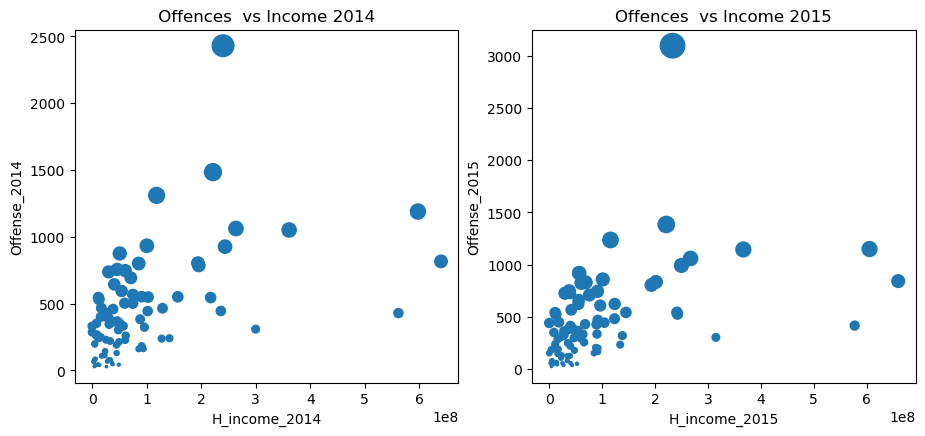

In [18]:
# Offence plot
fig = plt.figure()
fig = plt.figure(figsize=(10,5), dpi=100)
ax1 = fig.add_subplot(121)
ax = v_met_over_per_c_df.plot(x='H_income_2014',  y='Offense_2014', ax=ax1, kind="scatter",
                           legend = True, title = " Offences  vs Income 2014 ",s=(v_met_over_per_c_df.Offense_2014)/10)

# plot results Offense by neighborhood 
ax2 = fig.add_subplot(122) 
fig.tight_layout(pad=3.0)


ax = v_met_over_per_c_df.plot(x='H_income_2015',  y='Offense_2015', ax=ax2, kind="scatter",
                           legend = False, title = "Offences  vs Income 2015",s=(v_met_over_per_c_df.Offense_2015)/10)

plt.show()

# Education vs Crime Correlation 2014 & 2015

<Figure size 432x288 with 0 Axes>

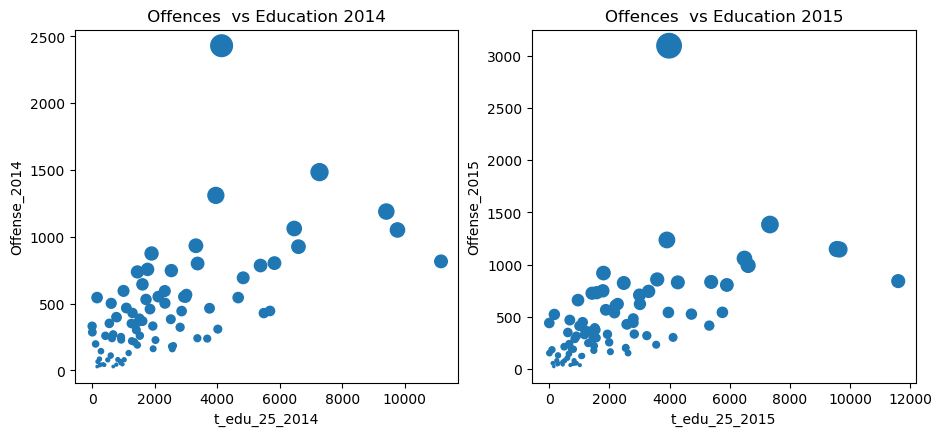

In [19]:
# Offence plot
fig = plt.figure()
fig = plt.figure(figsize=(10,5), dpi=100)
ax1 = fig.add_subplot(121)
ax = v_met_over_per_c_df.plot(x='t_edu_25_2014',  y='Offense_2014', ax=ax1, kind="scatter",
                           legend = True, title = " Offences  vs Education 2014 ",s=(v_met_over_per_c_df.Offense_2014)/10)

# plot results Offense by neighborhood 
ax2 = fig.add_subplot(122) 
fig.tight_layout(pad=3.0)
ax = v_met_over_per_c_df.plot(x='t_edu_25_2015',  y='Offense_2015', ax=ax2, kind="scatter",
                           legend = False, title = "Offences  vs Education 2015",s=(v_met_over_per_c_df.Offense_2015)/10)


plt.show()

# Statistics

In [22]:
# Statistics

v_2015_offen_pi =v_met_over_per_c_df['Offense_2015']
v_2015_offen_mean =np.mean(v_2015_offen_pi)
v_2015_offen_median =np.median(v_2015_offen_pi)
v_2015_offen_var = np.var(v_2015_offen_pi,ddof = 0)
v_2015_offen_std = np.std(v_2015_offen_pi,ddof = 0)
#v_2015_offen_sem = np.sem(v_2015_offen_pi)



print(f" The variance: {round(v_2015_offen_var)}")

# Correlations measures 
#Crime -Income


x=v_met_over_per_c_df[[('H_income_2015'), 'Offense_2015']].cov()
y=v_met_over_per_c_df[[('H_income_2015'), 'Offense_2015']].corr()
display("===============Income-Crime Offense====================")
display("=Covariance=")
display(x)
display("=Correlations=")
display(y)
#Crime -Education

x=v_met_over_per_c_df[[('t_edu_25_2015'), 'Offense_2015']].cov()
y=v_met_over_per_c_df[[('t_edu_25_2015'), 'Offense_2015']].corr()
display("===============Education -Crime Offense====================")
display("=Covariance=")
display(x)
display("=Correlation=")
display(y)

#x=v_met_over_per_c_df[[('H_income_2015'), 't_edu_25_2015']].cov()
y=v_met_over_per_c_df[[('Offense_2015'), 'Offense_2015']].corr()



display("===============Crime -Crime Offense====================")
#display("=Covariance=")
#display(x)
#display("=Correlation=")


 The variance: 180074


'===============Income-Crime Offense===================='

'=Covariance='

,H_income_2015,Offense_2015
H_income_2015,1.524216e+16,2.508887e+10
Offense_2015,2.508887e+10,1.821684e+05


'=Correlations='

,H_income_2015,Offense_2015
H_income_2015,1.000000,0.469072
Offense_2015,0.469072,1.000000


'===============Education -Crime Offense===================='

'=Covariance='

,t_edu_25_2015,Offense_2015
t_edu_25_2015,4.928026e+06,569889.526464
Offense_2015,5.698895e+05,182168.374766


'=Correlation='

,t_edu_25_2015,Offense_2015
t_edu_25_2015,1.000000,0.590355
Offense_2015,0.590355,1.000000


'===============Crime -Crime Offense===================='

# Summarize your conclusions. This should include a numerical summary (i.e., what data did your analysis yield), as well as visualizations of that summary (plots of the final analysis data) 

1. Main factors why violence occurs in US (rel)
2. Gender => affect violent incidents
3. Type of crime => affect violent incidents
4. Gun permission vs deaths

Pittsburgh
1. Income vs Crime (rel)
2. Education vs Crime (pending)

In [ ]:
Lau:

In [ ]:
Paolo:

In [ ]:
Mike:

# Discuss the implications of your findings. This is where you get to have an open-ended discussion about what your findings "mean". 

1. Main factors why violence occurs in US (rel)
2. Gender => affect violent incidents
3. Type of crime => affect violent incidents
4. Gun permission vs deaths

Pittsburgh
1. Income vs Crime (rel)
2. Education vs Crime (pending)

In [ ]:
Lau:

In [ ]:
Paolo:

In [ ]:
Mike: